In [176]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os

In [179]:
sys.path.append(os.path.abspath(os.path.join('scripts')))
from clean_data import *
from outlier import Outlier
from vizualizing_data import *

In [97]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../Week1_challenge_data_source(CSV).csv', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [98]:
db.shape

(150001, 55)

In [99]:
fd_desc = pd.read_excel("data/Field Descriptions.xlsx")
fd_desc

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [100]:
fd_desc.shape

(56, 2)

In [101]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

##### Exploring missing values from the data frame
Remove columns with with misssing values more than 30% except the important

In [102]:
percent_missing(db)

The dataset contains 12.5 % missing values.


In [103]:
missing_db = missing_values_table(db)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [104]:
missing_db

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.84,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,float64
Nb of sec with 125000B < Vol DL,97538,65.02,float64
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
HTTP UL (Bytes),81810,54.54,float64
HTTP DL (Bytes),81474,54.32,float64


In [105]:
missing_large= missing_db[missing_db['% of Total Values'] >=30.00].index.tolist()
missing_large

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [106]:
columns_to_remove = [col for col in missing_large if col not in ['TCP UL Retrans. Vol (Bytes)',
    'TCP DL Retrans. Vol (Bytes)']]
columns_to_remove

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [107]:
db.shape

(150001, 55)

In [108]:
db = db.drop(columns_to_remove,axis=1)

In [109]:
db.shape

(150001, 47)

In [110]:
percent_missing(db)

The dataset contains 3.6 % missing values.


In [111]:
missing_values_table(db)

Your selected dataframe has 47 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
Avg RTT DL (ms),27829,18.55,float64
Avg RTT UL (ms),27812,18.54,float64
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64


In [112]:
fix_missing_bfill(db, 'TCP UL Retrans. Vol (Bytes)')

0         7230.0
1         7230.0
2         7230.0
3         7230.0
4         7230.0
           ...  
149996       NaN
149997       NaN
149998       NaN
149999       NaN
150000       NaN
Name: TCP UL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [113]:
fix_missing_bfill(db, 'TCP DL Retrans. Vol (Bytes)')

0         19520.0
1         19520.0
2         19520.0
3         19520.0
4         19520.0
           ...   
149996        NaN
149997        NaN
149998        NaN
149999        NaN
150000        NaN
Name: TCP DL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [133]:
db['Avg RTT DL (ms)'].skew(skipna=True)

68.32205725904626

In [134]:
db['Avg RTT UL (ms)'].skew(skipna=True)

26.544462758647093

In [114]:
fix_missing_ffill(db, 'Avg RTT DL (ms)')

0         42.0
1         65.0
2         65.0
3         65.0
4         65.0
          ... 
149996    32.0
149997    27.0
149998    43.0
149999    37.0
150000    37.0
Name: Avg RTT DL (ms), Length: 150001, dtype: float64

In [115]:
fix_missing_ffill(db, 'Avg RTT UL (ms)')

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
149996    0.0
149997    2.0
149998    6.0
149999    5.0
150000    5.0
Name: Avg RTT UL (ms), Length: 150001, dtype: float64

In [116]:
percent_missing(db)

The dataset contains 0.19 % missing values.


In [117]:
percent_missing_rows(db)

2.08 % of the rows in the dataset contain atleast one missing value.


In [118]:
missing_values_table(db)

Your selected dataframe has 47 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.53,float64
UL TP < 10 Kbps (%),792,0.53,float64
Nb of sec with Vol DL < 6250B,755,0.50,float64
DL TP < 50 Kbps (%),754,0.50,float64


In [119]:
fix_missing_value(db, 'Handset Type', 'unknown')
fix_missing_value(db, 'Handset Manufacturer', 'unknown')

0           Samsung
1           Samsung
2           Samsung
3         undefined
4           Samsung
            ...    
149996        Apple
149997        Apple
149998        Apple
149999       Huawei
150000      unknown
Name: Handset Manufacturer, Length: 150001, dtype: object

In [120]:
percent_missing(db)

The dataset contains 0.17 % missing values.


In [121]:
percent_missing_rows(db)

2.08 % of the rows in the dataset contain atleast one missing value.


In [122]:
drop_rows_with_missing_values(db)

In [124]:
percent_missing(db)

The dataset contains 0.0 % missing values.


#### Data Type

In [125]:
db.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [126]:
db

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7.349883e+18,4/29/2019 7:28,794.0,4/30/2019 0:36,523.0,61661.0,2.082017e+14,3.376215e+10,3.586061e+13,D10033B,27.0,2.0,62.0,54.0,16552848.0,162614.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,22520.0,26980.0,6.166173e+07,Apple,Apple iPhone 6S Plus (A1687),136.0,149.0,857971.0,57778.0,8438995.0,3597665.0,1079443.0,651174.0,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,1.311448e+19,4/29/2019 7:28,114.0,4/30/2019 7:04,724.0,84940.0,2.082014e+14,3.376127e+10,3.532701e+13,D78058B,37.0,4.0,23.0,40.0,16552848.0,162614.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,26597.0,30281.0,8.494061e+07,Apple,Apple iPhone 6S (A1688),94.0,97.0,1717476.0,35240.0,3455682.0,3827662.0,60320.0,894557.0,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,808482329.0,1

In [129]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146887 non-null  float64       
 1   Start                           146887 non-null  datetime64[ns]
 2   Start ms                        146887 non-null  float64       
 3   End                             146887 non-null  datetime64[ns]
 4   End ms                          146887 non-null  float64       
 5   Dur. (ms)                       146887 non-null  float64       
 6   IMSI                            146887 non-null  float64       
 7   MSISDN/Number                   146887 non-null  float64       
 8   IMEI                            146887 non-null  float64       
 9   Last Location Name              146887 non-null  object        
 10  Avg RTT DL (ms)                 146887 non-null  float64

In [130]:
convert_to_datetime(db,['Start','End'])

In [131]:
db

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7.349883e+18,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,61661.0,2.082017e+14,3.376215e+10,3.586061e+13,D10033B,27.0,2.0,62.0,54.0,16552848.0,162614.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,22520.0,26980.0,6.166173e+07,Apple,Apple iPhone 6S Plus (A1687),136.0,149.0,857971.0,57778.0,8438995.0,3597665.0,1079443.0,651174.0,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,1.311448e+19,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,84940.0,2.082014e+14,3.376127e+10,3.532701e+13,D78058B,37.0,4.0,23.0,40.0,16552848.0,162614.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,26597.0,30281.0,8.494061e+07,Apple,Apple iPhone 6S (A1688),94.0,97.0,1717476.0,35240.0,3455682.0,3827662.0,60320.0,894557.0,22428728.0

In [132]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146887 non-null  float64       
 1   Start                           146887 non-null  datetime64[ns]
 2   Start ms                        146887 non-null  float64       
 3   End                             146887 non-null  datetime64[ns]
 4   End ms                          146887 non-null  float64       
 5   Dur. (ms)                       146887 non-null  float64       
 6   IMSI                            146887 non-null  float64       
 7   MSISDN/Number                   146887 non-null  float64       
 8   IMEI                            146887 non-null  float64       
 9   Last Location Name              146887 non-null  object        
 10  Avg RTT DL (ms)                 146887 non-null  float64

In [135]:
# get the columns with object data type
string_columns = db.select_dtypes(include='object').columns.tolist()
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [136]:
convert_to_string(db, string_columns)

In [137]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146887 non-null  float64       
 1   Start                           146887 non-null  datetime64[ns]
 2   Start ms                        146887 non-null  float64       
 3   End                             146887 non-null  datetime64[ns]
 4   End ms                          146887 non-null  float64       
 5   Dur. (ms)                       146887 non-null  float64       
 6   IMSI                            146887 non-null  float64       
 7   MSISDN/Number                   146887 non-null  float64       
 8   IMEI                            146887 non-null  float64       
 9   Last Location Name              146887 non-null  string        
 10  Avg RTT DL (ms)                 146887 non-null  float64

#### Top 10 Handsets

In [160]:
handsets = pd.DataFrame({'number of users':db.groupby(['Handset Type'])['Bearer Id'].count()}).reset_index()
Top_Ten_handsets = handsets.sort_values(['number of users'],ascending=False)
Top_Ten_handsets.head(10)

,Handset Type,number of users
308,Huawei B528S-23A,19373
52,Apple iPhone 6S (A1688),9369
48,Apple iPhone 6 (A1586),8967
1362,undefined,8820
58,Apple iPhone 7 (A1778),6240
72,Apple iPhone Se (A1723),5150
65,Apple iPhone 8 (A1905),4961
77,Apple iPhone Xr (A2105),4542
928,Samsung Galaxy S8 (Sm-G950F),4404
74,Apple iPhone X (A1901),3788


#### Top 3 handset manufacturers

In [163]:
#top 3 handset manufacturers
handset_manufac = pd.DataFrame({'handsets manufactured':db.groupby(['Handset Manufacturer'])['Bearer Id'].count()}).reset_index()
top_three_handset_manufac = handset_manufac.sort_values(['handsets manufactured'],ascending=False).reset_index()
top_three_handset_manufac.head(3)

,index,Handset Manufacturer,handsets manufactured
0,5,Apple,59069
1,102,Samsung,39902
2,52,Huawei,33754


#### top 5 handsets per top 3 handset manufacturer

In [164]:
handset_apple = db.groupby(['Handset Manufacturer']).get_group('Apple')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
handset_samsung = db.groupby(['Handset Manufacturer']).get_group('Samsung')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
handset_huawei= db.groupby(['Handset Manufacturer']).get_group('Huawei')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
print("\nTOP FIVE HANDSETS FROM APPLE\n")
print(handset_apple.head(5),"\n\n")
print("\nTOP FIVE HANDSETS FROM SUNMSUNG\n")
print(handset_samsung.head(5),"\n\n")
print("\nTOP FIVE HANDSETS FROM HUAWEI\n")
print(handset_huawei.head(5))


TOP FIVE HANDSETS FROM APPLE

                       Handset Type     Bearer Id
118756  Apple iPhone 7 Plus (A1784)  1.318654e+19
118644  Apple iPhone 7 Plus (A1784)  1.318654e+19
93449        Apple iPhone 6 (A1549)  1.318654e+19
92172       Apple iPhone Se (A1723)  1.318654e+19
92010       Apple iPhone 6S (A1688)  1.318654e+19 



TOP FIVE HANDSETS FROM SUNMSUNG

                             Handset Type     Bearer Id
117816       Samsung Galaxy S7 (Sm-G930X)  1.318654e+19
97250                   Samsung Galaxy J6  1.318654e+19
90717   Samsung Galaxy S9 Plus (Sm-G965F)  1.318654e+19
87479        Samsung Galaxy S8 (Sm-G950F)  1.318654e+19
85997         Samsung Galaxy J3 (Sm-J330)  1.318654e+19 



TOP FIVE HANDSETS FROM HUAWEI

            Handset Type     Bearer Id
144432    Huawei P20 Pro  1.318654e+19
138245  Huawei B525S-23A  1.318654e+19
137640  Huawei B525S-23A  1.318654e+19
132386    Huawei P20 Pro  1.318654e+19
122023  Huawei B525S-23A  1.318654e+19


# User Overview Analysis

#### Total download (DL) and upload (UL) data per user

In [210]:
total_data = db.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(10, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
3.373168e+10,9.443446e+11,1.037644e+13,1.132079e+13
3.360304e+10,3.362487e+10,3.775575e+11,4.111824e+11
3.361489e+10,6.894830e+08,8.156743e+09,8.846226e+09
3.362578e+10,7.295774e+08,7.770043e+09,8.499621e+09
3.362632e+10,6.696507e+08,7.301517e+09,7.971167e+09
3.367588e+10,5.815688e+08,7.309542e+09,7.891111e+09
3.365973e+10,6.242603e+08,7.081602e+09,7.705863e+09
3.366646e+10,4.050610e+08,6.903440e+09,7.308501e+09
3.366471e+10,4.715629e+08,6.400774e+09,6.872337e+09


# Outlier

In [144]:
outlier = Outlier(db)

In [145]:
db.shape

(146887, 47)

In [146]:
columns = db.select_dtypes('float64').columns.tolist()
columns

['Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [147]:
outlier.getOverview(columns)

,Min,Q1,Median,Q3,Max,IQR,Lower fence,Upper fence,Skew,Number_of_outliers,Percentage_of_outliers
Name of columns,,,,,,,,,,,
Bearer Id,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19,5.692543e+18,-1.188931e+18,2.158124e+19,0.023346,0,0.0%
Start ms,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02,4.990000e+02,-4.985000e+02,1.497500e+03,0.000823,0,0.0%
End ms,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02,4.990000e+02,-4.975000e+02,1.498500e+03,-0.001251,0,0.0%
Dur. (ms),7.142000e+03,5.852650e+04,8.639900e+04,1.331590e+05,1.859336e+06,7.463250e+04,-5.342225e+04,2.451078e+05,3.946115,7057,4.7%
IMSI,2.082001e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.082099e+14,3.703529e+08,2.082008e+14,2.082023e+14,5.194567,13027,8.68%
MSISDN/Number,3.360100e+10,3.365128e+10,3.366369e+10,3.368344e+10,3.370000e+14,3.215912e+07,3.360304e+10,3.373168e+10,383.258397,23786,15.86%
IMEI,4.400152e+11,3.546071e+13,3.572181e+13,8.611970e+13,9.900120e+13,5.065900e+13,-4.052779e+13,1.621082e+14,1.077380,0,0.0%
Avg RTT DL (ms),0.000000e+00,3.100000e+01,4.400000e+01,6.700000e+01,9.692300e+04,3.600000e+01,-2.300000e+01,1.210000e+02,68.322057,16181,10.79%
Avg RTT UL (ms),0.000000e+00,2.000000e+00,5.000000e+00,1.300000e+01,7.120000e+03,1.100000e+01,-1.450000e+01,2.950000e+01,26.544463,16278,10.85%


In [149]:
outlier.replace_outliers_with_fences(columns)

In [150]:
outlier.getOverview(columns)

,Min,Q1,Median,Q3,Max,IQR,Lower fence,Upper fence,Skew,Number_of_outliers,Percentage_of_outliers
Name of columns,,,,,,,,,,,
Bearer Id,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19,5.692543e+18,-1.188931e+18,2.158124e+19,0.023346,0,0.0%
Start ms,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02,4.990000e+02,-4.985000e+02,1.497500e+03,0.000823,0,0.0%
End ms,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02,4.990000e+02,-4.975000e+02,1.498500e+03,-0.001251,0,0.0%
Dur. (ms),7.142000e+03,5.852650e+04,8.639900e+04,1.331590e+05,2.451078e+05,7.463250e+04,-5.342225e+04,2.451078e+05,0.810424,0,0.0%
IMSI,2.082008e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.082023e+14,3.703529e+08,2.082008e+14,2.082023e+14,-0.290836,0,0.0%
MSISDN/Number,3.360304e+10,3.365128e+10,3.366369e+10,3.368344e+10,3.373168e+10,3.215912e+07,3.360304e+10,3.373168e+10,0.422680,0,0.0%
IMEI,4.400152e+11,3.546071e+13,3.572181e+13,8.611970e+13,9.900120e+13,5.065900e+13,-4.052779e+13,1.621082e+14,1.077380,0,0.0%
Avg RTT DL (ms),0.000000e+00,3.100000e+01,4.400000e+01,6.700000e+01,1.210000e+02,3.600000e+01,-2.300000e+01,1.210000e+02,1.069479,0,0.0%
Avg RTT UL (ms),0.000000e+00,2.000000e+00,5.000000e+00,1.300000e+01,2.950000e+01,1.100000e+01,-1.450000e+01,2.950000e+01,1.165443,0,0.0%


###### The total data volume (in Bytes) during this session for each application

In [151]:
db['Social Media Data Volume (Bytes)'] = db['Social Media UL (Bytes)'] + db['Social Media DL (Bytes)']
db['Google Data Volume (Bytes)'] = db['Google UL (Bytes)'] + db['Google DL (Bytes)']
db['Email Data Volume (Bytes)'] = db['Email UL (Bytes)'] + db['Email DL (Bytes)']
db['Youtube Data Volume (Bytes)'] = db['Youtube UL (Bytes)'] + db['Youtube DL (Bytes)']
db['Netflix Data Volume (Bytes)'] = db['Netflix UL (Bytes)'] + db['Netflix DL (Bytes)']
db['Gaming Data Volume (Bytes)'] = db['Gaming UL (Bytes)'] + db['Gaming DL (Bytes)']
db['Other Data Volume (Bytes)'] = db['Other UL (Bytes)'] + db['Other DL (Bytes)']
db['Total Data Volume (Bytes)'] = db['Total UL (Bytes)'] + db['Total DL (Bytes)']

In [153]:
db.shape

(146887, 55)

In [156]:
# save the clean dataframe to a csv file
db.to_csv('data/clean_data.csv')

###### Univariate Analysis by computing dispersion parameters for each quantitative variable

# Univariate Analysis

#### non graphical

In [170]:
univariate_analysis = db.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum', 'Social Media Data Volume (Bytes)':'sum', 'Google Data Volume (Bytes)':'sum',
                                               'Email Data Volume (Bytes)':'sum', 'Youtube Data Volume (Bytes)':'sum', 'Netflix Data Volume (Bytes)':'sum',
                                              'Gaming Data Volume (Bytes)':'sum', 'Other Data Volume (Bytes)':'sum', 'Total Data Volume (Bytes)':'sum', 'Bearer Id':'count'}).reset_index()
univariate_analysis['no.xdr_session'] = univariate_analysis['Bearer Id'] 
univariate_analysis.describe()

,MSISDN/Number,Dur. (ms),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes),Bearer Id,no.xdr_session
count,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,88754.000000,88754.000000
mean,3.365753e+10,1.658115e+05,3.024885e+06,1.292212e+07,3.738767e+06,3.747226e+07,3.745115e+07,7.122294e+08,7.104326e+08,8.205136e+08,1.654990,1.654990
std,2.284554e+07,7.849665e+06,1.412430e+08,6.026986e+08,1.747922e+08,1.752791e+09,1.750155e+09,3.296754e+10,3.324616e+10,3.802566e+10,77.133928,77.133928
min,3.360304e+10,7.146000e+03,1.563000e+03,4.033000e+04,1.817600e+04,1.574460e+05,1.845690e+05,3.063580e+05,1.127863e+06,3.324901e+07,1.000000,1.000000
25%,3.365004e+10,7.174175e+04,1.208778e+06,5.934782e+06,1.671072e+06,1.860487e+07,1.855552e+07,2.875736e+08,2.846144e+08,3.577558e+08,1.000000,1.000000
50%,3.366175e+10,1.024630e+05,2.298405e+06,9.554298e+06,2.789756e+06,2.673247e+07,2.666666e+07,5.417826e+08,5.376331e+08,6.172002e+08,1.000000,1.000000
75%,3.366804e+10,1.727990e+05,3.300110e+06,1.317565e+07,3.835314e+06,3.779608e+07,3.782582e+07,7.762873e+08,7.730036e+08,8.559140e+08,2.000000,2.000000
max,3.373168e+10,2.337076e+09,4.205055e+10,1.794349e+11,5.203937e+10,5.218528e+11,5.210680e+11,9.814774e+12,9.898256e+12,1.132079e+13,22965.000000,22965.000000


# Graphical

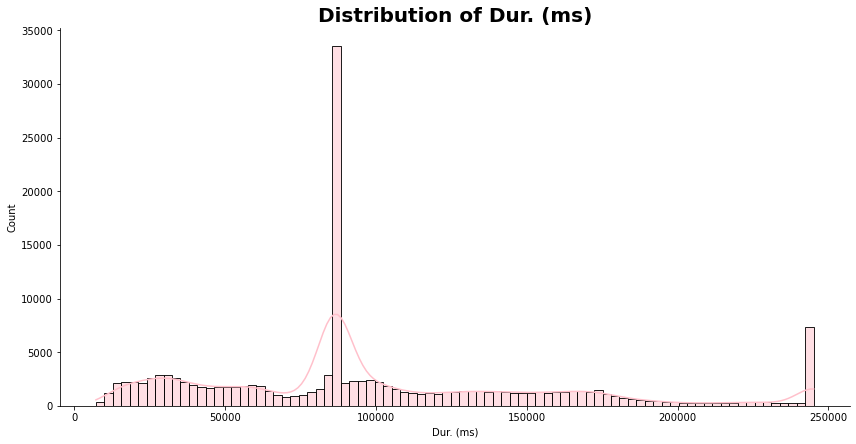

In [181]:
plot_hist(db, 'Dur. (ms)', 'pink')

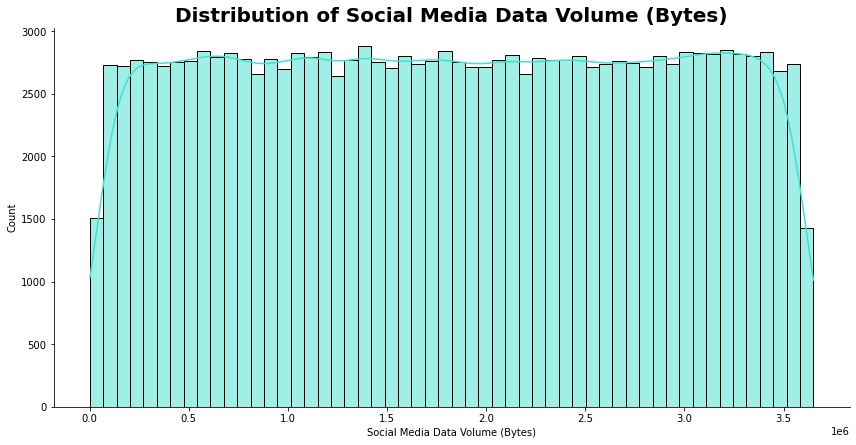

In [183]:
plot_hist(db, 'Social Media Data Volume (Bytes)', 'turquoise')

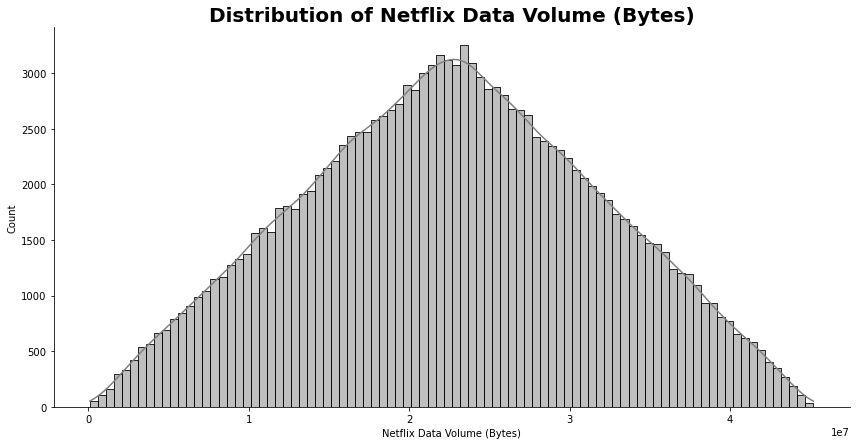

In [188]:
plot_hist(db, 'Netflix Data Volume (Bytes)', 'grey')

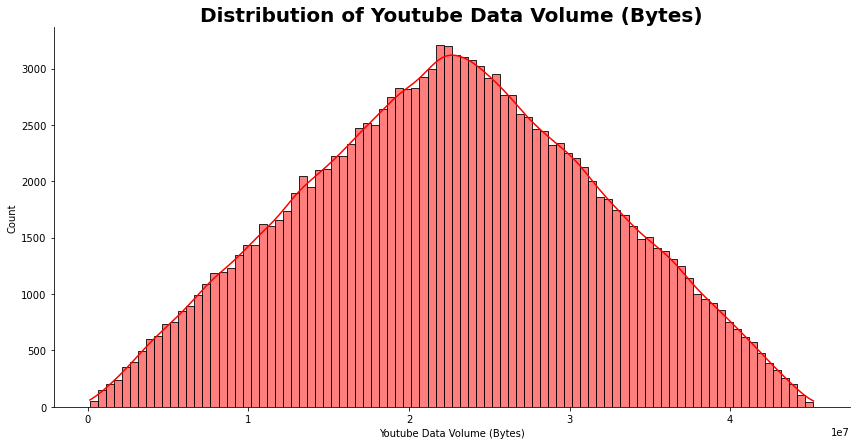

In [187]:
plot_hist(db, 'Youtube Data Volume (Bytes)', 'Red')

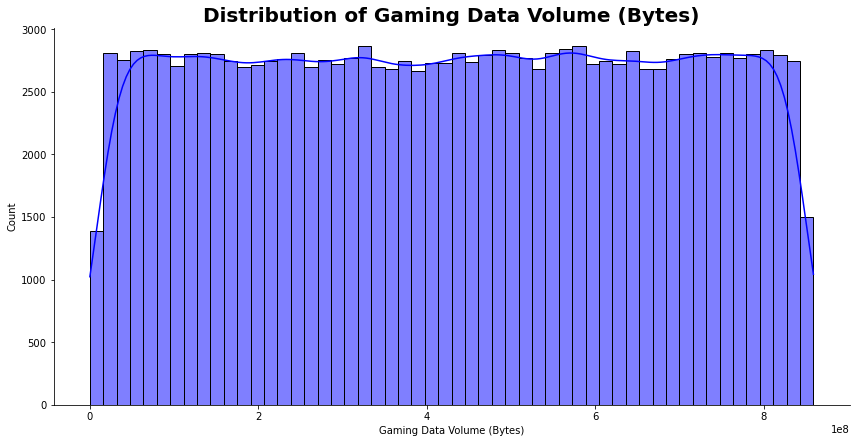

In [191]:
plot_hist(db, 'Gaming Data Volume (Bytes)', 'blue')

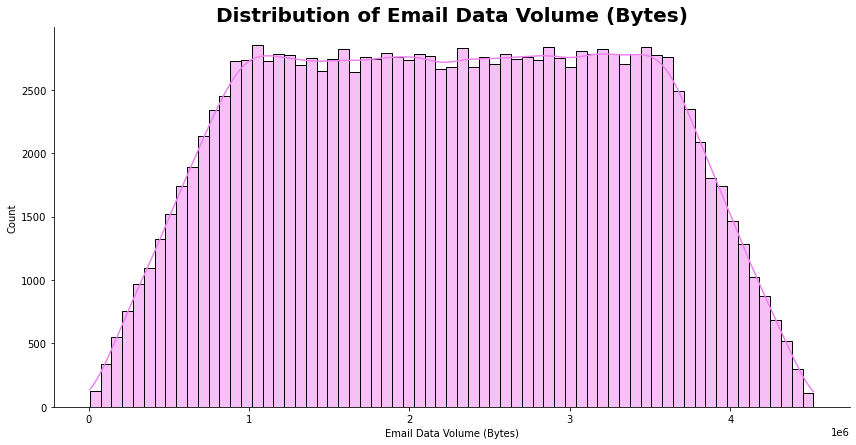

In [193]:
plot_hist(db, 'Email Data Volume (Bytes)', 'violet')

# Bivariate Analysis

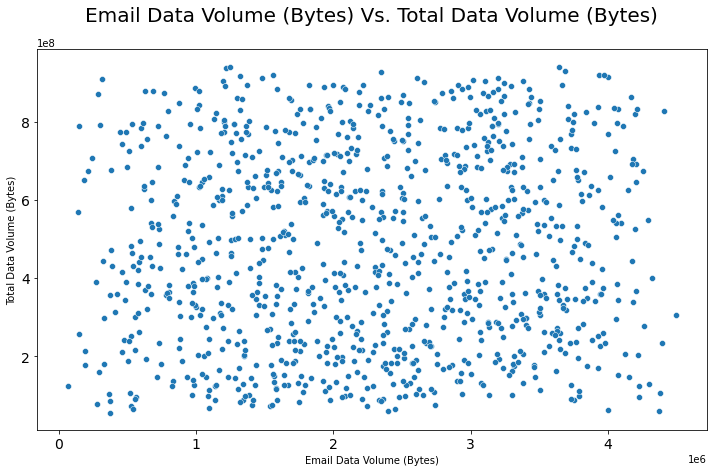

In [199]:
plot_scatter(db.head(1000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

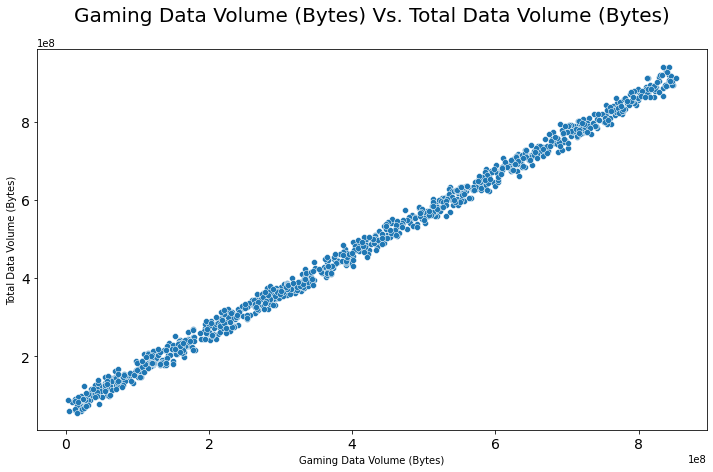

In [200]:
plot_scatter(db.head(1000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

In [204]:
application_cols = ['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']

correlation = db[application_cols].corr()
correlation

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


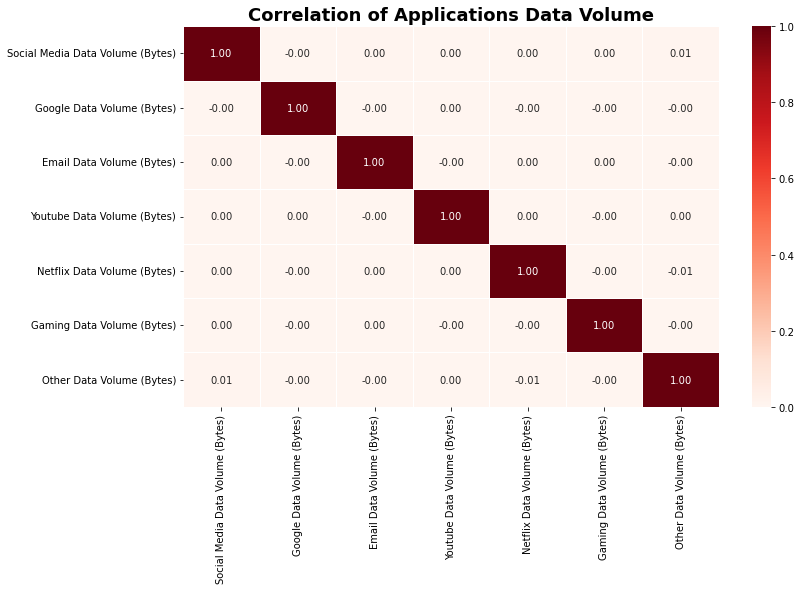

In [205]:
plot_heatmap(correlation, "Correlation of Applications Data Volume")